###  David Corkern


## Dollar General Store #8687: 206 N Harrison St, Princeton, KY 42445

## 1) Import Libraries

In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Import Data

<p>  Create separate DataFrames for every Excel sheet in Store Data. </p>

Denote necessary sheet names from Excel workbook.


In [575]:
dfSales8687 = pd.read_excel('data/2017 Data for Store 8687 - MTSU.xlsx', sheet_name='Sales')
dfReceipts8687 = pd.read_excel('data/2017 Data for Store 8687 - MTSU.xlsx', sheet_name='Receipts')
dfProducts = pd.read_csv('data/ProductMaster.csv', header=0)
dfVendors = pd.read_csv('data/VendorMaster.csv', header=0)

## 3) Explore Data

Before doing any analysis I want to understand the data I have, how it is organized, and how the data needs to be changed to better perform analyses and build machine learning models.

**Below:** 
*  I show several Top 10 lists from dfSales8687.
  *  Top 10 Most Sold
  *  Top 10 Most Costly


*  Do some initial data cleansing to be able to merge DataFrames.

In [576]:
dfReceipts8687.head()

,Fiscal Week,Trans Date,Primary Service DC Num,Destination Store or DC,Item SKU,Primary Sku,Units
0,1,2017-02-08,96000,8687,1071601,1071601,2
1,1,2017-02-08,96000,8687,1072201,1072201,5
2,1,2017-02-08,96000,8687,1072701,1072701,5
3,1,2017-02-08,96000,8687,1079101,1079101,6
4,1,2017-02-08,96000,8687,1081001,1081001,1


In [577]:
dfSales8687.head()

,Transaction ID,Fiscal Week,Date,Time,Store,Primary Service DC Num,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,Gross Sales
0,-1081782225,1,2017-02-04,14:40:37,8687,96000,16131502,16131502,1,2.0,0.52563,2.00,2.0
1,-1081782225,1,2017-02-04,14:40:37,8687,96000,16131502,16131502,1,2.0,0.52563,2.00,2.0
2,-1081782128,1,2017-02-04,18:04:43,8687,96000,16363701,18799801,1,4.0,3.54900,4.50,4.0
3,-1081782128,1,2017-02-04,18:04:43,8687,96000,15691201,15691201,1,4.5,3.78000,4.95,4.5
4,-1081782128,1,2017-02-04,18:04:43,8687,96000,6555901,6555902,1,0.7,0.60900,0.70,0.7


In [578]:
dfSales8687.columns

Index(['Transaction\nID', 'Fiscal\nWeek', 'Date', 'Time', 'Store',
       'Primary Service \nDC Num', 'Item\nSKU', 'Primary Sku', 'Units',
       'Sales', 'Cost', 'Extended\nPLU Price', 'Gross\nSales'],
      dtype='object')

#### Intro Data Cleansing 

*  Remove '\n' from Column Names for ease of writing code and remove formatting.

  *  Removed from Sales and Receipts DataFrames

In [579]:
newSalesCols = ['Transaction ID', 'Fiscal Week', 'Date', 'Time', 'Store',
       'Primary Service DC Num', 'Item SKU', 'Primary Sku', 'Units',
       'Sales', 'Cost', 'Extended PLU Price', 'Gross Sales']

In [580]:
dfSales8687.columns = newSalesCols

In [581]:
dfReceipts8687.columns

Index(['Fiscal\nWeek', 'Trans\nDate', 'Primary Service \nDC Num',
       'Destination\nStore or DC', 'Item\nSKU', 'Primary Sku', 'Units'],
      dtype='object')

In [582]:
newRecCols = ['Fiscal Week', 'Trans Date', 'Primary Service DC Num',
       'Destination Store or DC', 'Item SKU', 'Primary Sku', 'Units']

In [583]:
dfReceipts8687.columns = newRecCols

### Top 10 Most Sold - Item SKUs 

In [584]:
dfSales8687.groupby('Item SKU')['Transaction ID'].nunique().sort_values(ascending=False).head(10)

Item SKU
1011801     1710
988504      1304
988301      1289
765803      1209
812603      1023
1013001      985
829105       851
812601       799
12083801     721
11486401     717
Name: Transaction ID, dtype: int64

###  Top 10 Most Costly Items Sold

In [585]:
dfSales8687.groupby('Item SKU')['Cost'].max().sort_values(ascending=False).head(10)

Item SKU
812801      102.835686
782401       25.872000
11606002     23.625000
11605902     23.362500
907501       21.280875
11606802     19.257000
18089301     18.942000
18089601     18.942000
18089801     18.942000
18089901     18.942000
Name: Cost, dtype: float64

In [144]:
dfProducts.head()

,Primary Sku,Primary Sku Description,Class,Class Description,vendor_id,case,inner,Item Velocity (IT04)
0,459301,NEW SKIN LIQUID BANDAGE,1000,BANDAGES/TAPE/GAUZE,271668,24,24,UNASSIGNED
1,459504,DGH STRONG BNDG 20CT,1000,BANDAGES/TAPE/GAUZE,1236,6,4,UNASSIGNED
2,459701,RX N/STICK PADS 3X4-10CT,1000,BANDAGES/TAPE/GAUZE,1236,24,3,UNASSIGNED
3,459802,DGH FABRIC BNDG AST 100CT,1000,BANDAGES/TAPE/GAUZE,1236,24,3,UNASSIGNED
4,459901,BAND AID ADHESIVE PAD LRG,1000,BANDAGES/TAPE/GAUZE,1662,4,6,UNASSIGNED


In [145]:
dfProducts.columns

Index(['Primary Sku', 'Primary Sku Description', 'Class', 'Class Description',
       'vendor_id', 'case', 'inner', 'Item Velocity (IT04)'],
      dtype='object')

In [146]:
dfSales8687.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432789 entries, 0 to 432788
Data columns (total 13 columns):
Transaction ID            432789 non-null int64
Fiscal Week               432789 non-null int64
Date                      432789 non-null datetime64[ns]
Time                      432789 non-null object
Store                     432789 non-null int64
Primary Service DC Num    432789 non-null int64
Item SKU                  432789 non-null int64
Primary Sku               432789 non-null int64
Units                     432789 non-null int64
Sales                     432789 non-null float64
Cost                      432789 non-null float64
Extended PLU Price        432789 non-null float64
Gross Sales               432789 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 42.9+ MB


In [147]:
dfReceipts8687.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74746 entries, 0 to 74745
Data columns (total 7 columns):
Fiscal Week                74746 non-null int64
Trans Date                 74746 non-null datetime64[ns]
Primary Service DC Num     74746 non-null int64
Destination Store or DC    74746 non-null int64
Item SKU                   74746 non-null int64
Primary Sku                74746 non-null int64
Units                      74746 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.0 MB


####  Data Cleansing

*  Rename dfProducts['vendor_id'] to 'Vendor_ID'.
*  This allows for merging dfProducts with dfVendors several cells below using 'Vendor ID' as the key.
  *  'Vendor ID' is already named in dfVendors.

In [586]:
dfProducts.rename(columns={'vendor_id': 'Vendor ID'}, inplace=True)

In [587]:
dfVendors.columns

Index(['Vendor ID', 'Vendor'], dtype='object')

In [588]:
dfVendors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 2 columns):
Vendor ID    844 non-null int64
Vendor       844 non-null object
dtypes: int64(1), object(1)
memory usage: 13.3+ KB


In [589]:
dfProducts['Vendor ID'].nunique()

844

In [152]:
dfProducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
Primary Sku                11162 non-null int64
Primary Sku Description    11162 non-null object
Class                      11162 non-null int64
Class Description          11162 non-null object
Vendor ID                  11162 non-null int64
case                       11162 non-null int64
inner                      11162 non-null int64
Item Velocity (IT04)       11162 non-null object
dtypes: int64(5), object(3)
memory usage: 697.7+ KB


### 4) Merge Data

#### Merge dfProducts with dfVendors.
#### Merge dfVendorProduct each with dfSales8687 and dfReceipt8687.

Doesn't make sense to combine all DataFrames together into one master DataFrame, they are separate stories. 

All Vendors are represented in the dfProducts table, therefore we can do an inner join and not lose any rows.

In [590]:
dfVendorProduct = pd.merge(dfProducts, dfVendors, on='Vendor ID', how='inner')

In [591]:
dfVendorProduct.head()

,Primary Sku,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor
0,459301,NEW SKIN LIQUID BANDAGE,1000,BANDAGES/TAPE/GAUZE,271668,24,24,UNASSIGNED,Vendor 714
1,474501,VIVARIN A/AID TBLTS-16 CT,1002,ANALGESICS,271668,8,6,UNASSIGNED,Vendor 714
2,477801,MIDNITE SLEEP AID CHEW-10,1002,ANALGESICS,271668,12,4,UNASSIGNED,Vendor 714
3,574401,MEGA-T GREEN TEA CPLT-30,1022,DIET,271668,48,48,UNASSIGNED,Vendor 714
4,600503,ABSORBINE ULTRA PATCH,1033,EXTERNAL ANALGESIC RUBS,271668,18,18,UNASSIGNED,Vendor 714


In [156]:
dfVendorProduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 9 columns):
Primary Sku                11162 non-null int64
Primary Sku Description    11162 non-null object
Class                      11162 non-null int64
Class Description          11162 non-null object
Vendor ID                  11162 non-null int64
case                       11162 non-null int64
inner                      11162 non-null int64
Item Velocity (IT04)       11162 non-null object
Vendor                     11162 non-null object
dtypes: int64(5), object(4)
memory usage: 872.0+ KB


In [157]:
dfSales8687.head()

,Transaction ID,Fiscal Week,Date,Time,Store,Primary Service DC Num,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,Gross Sales
0,-1081782225,1,2017-02-04,14:40:37,8687,96000,16131502,16131502,1,2.0,0.52563,2.00,2.0
1,-1081782225,1,2017-02-04,14:40:37,8687,96000,16131502,16131502,1,2.0,0.52563,2.00,2.0
2,-1081782128,1,2017-02-04,18:04:43,8687,96000,16363701,18799801,1,4.0,3.54900,4.50,4.0
3,-1081782128,1,2017-02-04,18:04:43,8687,96000,15691201,15691201,1,4.5,3.78000,4.95,4.5
4,-1081782128,1,2017-02-04,18:04:43,8687,96000,6555901,6555902,1,0.7,0.60900,0.70,0.7


In [158]:
dfReceipts8687.head()

,Fiscal Week,Trans Date,Primary Service DC Num,Destination Store or DC,Item SKU,Primary Sku,Units
0,1,2017-02-08,96000,8687,1071601,1071601,2
1,1,2017-02-08,96000,8687,1072201,1072201,5
2,1,2017-02-08,96000,8687,1072701,1072701,5
3,1,2017-02-08,96000,8687,1079101,1079101,6
4,1,2017-02-08,96000,8687,1081001,1081001,1


In [592]:
dfReceipts8687['Primary Sku'].nunique()

16945

In [593]:
dfVendorProduct['Primary Sku'].nunique()

11144

#### Create a merged DataFrame of Receipts with Products and Vendors

Right Join on dfReceipts8687. There are more unique key values in this table than dfVendorProduct. I don't want to lose those rows because they don't have a corresponding value in the DF join.

In [594]:
receipts_combine = pd.merge(dfVendorProduct, dfReceipts8687, on='Primary Sku', how='right')

In [595]:
receipts_combine.head()

,Primary Sku,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor,Fiscal Week,Trans Date,Primary Service DC Num,Destination Store or DC,Item SKU,Units
0,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,1,2017-02-08,96000,8687,459301,1
1,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,6,2017-03-15,96000,8687,459301,1
2,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,7,2017-03-22,96000,8687,459301,2
3,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,8,2017-03-29,96000,8687,459301,3
4,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,15,2017-05-17,96000,8687,459301,1


In [163]:
receipts_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74996 entries, 0 to 74995
Data columns (total 15 columns):
Primary Sku                74996 non-null int64
Primary Sku Description    59853 non-null object
Class                      59853 non-null float64
Class Description          59853 non-null object
Vendor ID                  59853 non-null float64
case                       59853 non-null float64
inner                      59853 non-null float64
Item Velocity (IT04)       59853 non-null object
Vendor                     59853 non-null object
Fiscal Week                74996 non-null int64
Trans Date                 74996 non-null datetime64[ns]
Primary Service DC Num     74996 non-null int64
Destination Store or DC    74996 non-null int64
Item SKU                   74996 non-null int64
Units                      74996 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 9.2+ MB


#### Create a merged DataFrame of Sales with Products and Vendors

In [165]:
dfSales8687['Primary Sku'].nunique()


9064

In [166]:
dfVendorProduct['Primary Sku'].nunique()

11144

#### I Inner Join dfSales8687 with dfVendorProduct. Though there are less unique values in dfSales, it the sales information I am concerned with in this merged DF. All vendor data is available in the combined Receipts DataFrame.

*  Having more unique values in dfVendorProduct also tells me that there are items in inventory that have never been sold, or there are Products that have been discontinued from inventory but still remain in the system.

In [596]:
sales_combine = pd.merge(dfSales8687, dfVendorProduct, how='inner', on='Primary Sku')

In [597]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Store,Primary Service DC Num,Item SKU,Primary Sku,Units,Sales,...,Extended PLU Price,Gross Sales,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor
0,-1081782225,1,2017-02-04,14:40:37,8687,96000,16131502,16131502,1,2.0,...,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
1,-1081782225,1,2017-02-04,14:40:37,8687,96000,16131502,16131502,1,2.0,...,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
2,-1081782090,1,2017-02-04,20:08:59,8687,96000,16131502,16131502,1,2.0,...,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
3,-1026285155,2,2017-02-13,17:28:36,8687,96000,16131502,16131502,1,2.0,...,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
4,-1019048988,2,2017-02-14,14:44:37,8687,96000,16131502,16131502,1,2.0,...,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543


In [169]:
sales_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434726 entries, 0 to 434725
Data columns (total 21 columns):
Transaction ID             434726 non-null int64
Fiscal Week                434726 non-null int64
Date                       434726 non-null datetime64[ns]
Time                       434726 non-null object
Store                      434726 non-null int64
Primary Service DC Num     434726 non-null int64
Item SKU                   434726 non-null int64
Primary Sku                434726 non-null int64
Units                      434726 non-null int64
Sales                      434726 non-null float64
Cost                       434726 non-null float64
Extended PLU Price         434726 non-null float64
Gross Sales                434726 non-null float64
Primary Sku Description    434726 non-null object
Class                      434726 non-null int64
Class Description          434726 non-null object
Vendor ID                  434726 non-null int64
case                       434726 no

### 3) Explore Data

Gather a better understanding of the new merged DataFrames, and do more initial exploration of top items sold by sum and count, but with Primary Sku Description included so I know the actual product, not just the Item SKU.

#### Total Sales grouped by Primary Sku and Item SKU

*  #### Toilet paper takes 5 of Top 10 spots
  *  Angel Soft 12 Fam Pack is top sales position at $6535.89
*  #### Sugar has 2 Item SKUs for one Primary Sku. By Primary Sku it is the second largest total sales.

In [598]:
sales_combine.groupby(['Primary Sku', 'Primary Sku Description', 
                    'Item SKU'])['Sales'].sum().sort_values(ascending=False).head(10)

Primary Sku  Primary Sku Description    Item SKU
988504       ANGEL SOFT 12 FAM PACK     988504      6535.89
1082401      ALPO DRY PRIME CUTS 14LB   1082401     3252.94
16050101     FOLGERS COUNTRY RST 31.1Z  16050101    2802.98
988301       ANGEL SOFT 4PK DBL ROLL    988301      2641.62
17743801     CHARMIN ESS SOFT 12 DR     17743802    2570.49
15105701     DGH 12 MEGA ULTRA STRONG   15105701    2379.41
1011801      S S 6ROLL BATH TISSUE      1011801     2279.49
12083801     CV WATER 24PK              12083801    2234.85
812601       CV SUGAR 4LB               812603      2222.70
                                        812601      1753.65
Name: Sales, dtype: float64

In [599]:
sales_combine.groupby(['Primary Sku', 'Primary Sku Description'])['Sales'].sum().sort_values(ascending=False).head(10)

Primary Sku  Primary Sku Description  
988504       ANGEL SOFT 12 FAM PACK       6535.89
812601       CV SUGAR 4LB                 3976.35
1082401      ALPO DRY PRIME CUTS 14LB     3843.02
17743801     CHARMIN ESS SOFT 12 DR       3735.16
1011801      S S 6ROLL BATH TISSUE        2821.67
16050101     FOLGERS COUNTRY RST 31.1Z    2802.98
988301       ANGEL SOFT 4PK DBL ROLL      2641.62
989603       COTTONELLE 12 BIG BATH       2533.06
15105701     DGH 12 MEGA ULTRA STRONG     2379.41
1081001      ALPO DRY COME GET IT 14LB    2262.36
Name: Sales, dtype: float64

####  Top 10 Items By # of Units Sold

*  Some change from the summed revenue Top 10, but many are in both lists, particularly Toilet Paper.
*  Snacks made it onto the list (Reeses, Vienna Sausages), unsuprisingly, as they are impulse buys and low cost.

In [600]:
sales_combine.groupby(['Primary Sku', 'Primary Sku Description', 'Class Description'])['Units'].sum().sort_values(ascending=False).head(10)

Primary Sku  Primary Sku Description    Class Description        
1011801      S S 6ROLL BATH TISSUE      BATH TISSUE PRIVATE BRAND    2830
812601       CV SUGAR 4LB               SUGAR                        2027
829105       VIENNA SAUSAGES            CANNED MEAT                  2021
765803       REESE SNACK PACK           CHOCOLATE CANDY              1666
988504       ANGEL SOFT 12 FAM PACK     BATH TISSUE                  1344
988301       ANGEL SOFT 4PK DBL ROLL    BATH TISSUE                  1320
1013001      DGH SFT STRONG TWL 1ROLL   PAPER TOWEL PRIVATE BRAND    1163
1113501      FP WET FOOD TUNA 5.5OZ     CAT FOOD PRIVATE BRAND        988
880502       CMPBL CHCKN NOODLE 13.8OZ  CANNED SOUP                   948
1113601      FP WET FOOD CHKN 5.5OZ     CAT FOOD PRIVATE BRAND        860
Name: Units, dtype: int64

####  20 Largest Transactions by Purchase Sum.
  *  No purchases greater than 500 dollars. 
  * One purchase greater than 200 dollars.
  

In [601]:
sales_combine.groupby('Transaction ID')['Sales'].sum().sort_values(ascending=False).head(20)

Transaction ID
 1187896081    474.75
 102599471     199.50
 982256803     184.50
-599272546     181.30
 1221499690    158.90
-700816462     157.45
 237461831     155.10
-369179958     155.05
 750244774     154.10
 852168572     154.05
 1068978672    148.65
 830197223     146.35
 439778327     137.45
-226011296     137.40
-63604916      137.37
 1187895685    133.45
-248088401     132.15
 77674789      131.45
 1117018555    130.65
 57532155      130.10
Name: Sales, dtype: float64

### 5) Cleanse Data

A bit of data cleansing was completed above to strip formatting from column names of the Sales and Receipts DataFrames to be able to pd.merge with the Vendor and Product DataFrame.

**Below:**
*  Drop columns from several DataFrames that hold the store # or distribution center #
  *  I also make copies of the DataFrames before I do this, for when I combine data in the group project.

*  Vendor is stripped of 'Vendor' string in row instances and remaining integer value is converted to numeric data for future processing.



In [602]:
# Create copies of merged DFs to use later with group project, where store #s will be of value.

sales_combine_entire = sales_combine.copy()
receipts_combine_entire = receipts_combine.copy()

In [176]:
sales_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434726 entries, 0 to 434725
Data columns (total 21 columns):
Transaction ID             434726 non-null int64
Fiscal Week                434726 non-null int64
Date                       434726 non-null datetime64[ns]
Time                       434726 non-null object
Store                      434726 non-null int64
Primary Service DC Num     434726 non-null int64
Item SKU                   434726 non-null int64
Primary Sku                434726 non-null int64
Units                      434726 non-null int64
Sales                      434726 non-null float64
Cost                       434726 non-null float64
Extended PLU Price         434726 non-null float64
Gross Sales                434726 non-null float64
Primary Sku Description    434726 non-null object
Class                      434726 non-null int64
Class Description          434726 non-null object
Vendor ID                  434726 non-null int64
case                       434726 no

In [ ]:
sales_combine['Store'].nunique()

In [180]:
sales_combine['Primary Service DC Num'].nunique()

1

In [603]:
# Drop columns

sales_combine.drop(['Store','Primary Service DC Num'], inplace=True, axis=1)

In [604]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,Gross Sales,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
3,-1026285155,2,2017-02-13,17:28:36,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543
4,-1019048988,2,2017-02-14,14:44:37,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,Vendor 543


*  Drop 'Destination Store or DC' from receipts_combine DataFrame. There is only one value, 8687, our store number, and is therefore an unnecessary column.

In [185]:
receipts_combine['Destination Store or DC'].nunique()

1

In [605]:
receipts_combine.drop(['Destination Store or DC'], inplace=True, axis=1)

In [187]:
receipts_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74996 entries, 0 to 74995
Data columns (total 14 columns):
Primary Sku                74996 non-null int64
Primary Sku Description    59853 non-null object
Class                      59853 non-null float64
Class Description          59853 non-null object
Vendor ID                  59853 non-null float64
case                       59853 non-null float64
inner                      59853 non-null float64
Item Velocity (IT04)       59853 non-null object
Vendor                     59853 non-null object
Fiscal Week                74996 non-null int64
Trans Date                 74996 non-null datetime64[ns]
Primary Service DC Num     74996 non-null int64
Item SKU                   74996 non-null int64
Units                      74996 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 8.6+ MB


In [188]:
receipts_combine.head()

,Primary Sku,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor,Fiscal Week,Trans Date,Primary Service DC Num,Item SKU,Units
0,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,1,2017-02-08,96000,459301,1
1,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,6,2017-03-15,96000,459301,1
2,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,7,2017-03-22,96000,459301,2
3,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,8,2017-03-29,96000,459301,3
4,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,Vendor 714,15,2017-05-17,96000,459301,1


#### Strip the 'Vendor' string from the values in the Vendor Column

In [606]:
receipts_combine['Vendor'] = receipts_combine['Vendor'].str.replace('Vendor ','')

In [607]:
sales_combine['Vendor'] = sales_combine['Vendor'].str.replace('Vendor ','')

In [608]:
receipts_combine.head()

,Primary Sku,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor,Fiscal Week,Trans Date,Primary Service DC Num,Item SKU,Units
0,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,714,1,2017-02-08,96000,459301,1
1,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,714,6,2017-03-15,96000,459301,1
2,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,714,7,2017-03-22,96000,459301,2
3,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,714,8,2017-03-29,96000,459301,3
4,459301,NEW SKIN LIQUID BANDAGE,1000.0,BANDAGES/TAPE/GAUZE,271668.0,24.0,24.0,UNASSIGNED,714,15,2017-05-17,96000,459301,1


In [199]:
sales_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434726 entries, 0 to 434725
Data columns (total 19 columns):
Transaction ID             434726 non-null int64
Fiscal Week                434726 non-null int64
Date                       434726 non-null datetime64[ns]
Time                       434726 non-null object
Item SKU                   434726 non-null int64
Primary Sku                434726 non-null int64
Units                      434726 non-null int64
Sales                      434726 non-null float64
Cost                       434726 non-null float64
Extended PLU Price         434726 non-null float64
Gross Sales                434726 non-null float64
Primary Sku Description    434726 non-null object
Class                      434726 non-null int64
Class Description          434726 non-null object
Vendor ID                  434726 non-null int64
case                       434726 non-null int64
inner                      434726 non-null int64
Item Velocity (IT04)       434726 no

In [202]:
receipts_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74996 entries, 0 to 74995
Data columns (total 14 columns):
Primary Sku                74996 non-null int64
Primary Sku Description    59853 non-null object
Class                      59853 non-null float64
Class Description          59853 non-null object
Vendor ID                  59853 non-null float64
case                       59853 non-null float64
inner                      59853 non-null float64
Item Velocity (IT04)       59853 non-null object
Vendor                     59853 non-null float64
Fiscal Week                74996 non-null int64
Trans Date                 74996 non-null datetime64[ns]
Primary Service DC Num     74996 non-null int64
Item SKU                   74996 non-null int64
Units                      74996 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(3)
memory usage: 8.6+ MB


###  6)  Data Transformation

*  Convert the data type of the Vendor columns to integer for future model creation.  
  *  The name of the column is Vendor, is isn't necessary in row instances.
  

*  **Weekday Column:** Create new columns in sales_combine and receipts_combine to show the day of the week for each transaction. 
  *  Allows for better analysis of understanding purchases based on day.


*  **Quantitative Column:** 
  *  Create **'Profit Margin'** column as sales_combine['Sales'] - sales_combine['Cost'].
    *  Good derived value to know. Allows for understanding of most/least profitable products in store.
  *  Create **'Profit %'** column as profit margin ratio.
    *  Better understand the percentage of transaction line item that is profit. See if there are loss leaders and what are the most profitable items.


In [609]:
# Convert object datatype to numeric

receipts_combine['Vendor'] = pd.to_numeric(receipts_combine['Vendor'])

In [610]:
sales_combine['Vendor'] = pd.to_numeric(sales_combine['Vendor'])

In [611]:
sales_combine['weekday'] = sales_combine['Date'].dt.day_name()
receipts_combine['weekday'] = receipts_combine['Trans Date'].dt.day_name()

In [612]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,Gross Sales,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor,weekday
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday
3,-1026285155,2,2017-02-13,17:28:36,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Monday
4,-1019048988,2,2017-02-14,14:44:37,16131502,16131502,1,2.0,0.52563,2.0,2.0,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Tuesday


In [613]:
sales_combine['Profit Margin'] = sales_combine['Extended PLU Price'] - sales_combine['Cost']

In [614]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,...,Primary Sku Description,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor,weekday,Profit Margin
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,...,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437
3,-1026285155,2,2017-02-13,17:28:36,16131502,16131502,1,2.0,0.52563,2.0,...,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Monday,1.47437
4,-1019048988,2,2017-02-14,14:44:37,16131502,16131502,1,2.0,0.52563,2.0,...,TRIM ROLLER 3IN,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Tuesday,1.47437


#### Average total sale was a dollar fifty.

In [615]:
sales_combine['Sales'].median()

1.5

####  Large Purchases Column
  *  Have to create a new DF of the groupby and then merge it back to the original DF.

In [616]:
large_pur = sales_combine.groupby('Transaction ID')['Extended PLU Price'].sum() > 10
large_pur = pd.DataFrame(large_pur)

In [617]:
large_pur.rename(columns={'Extended PLU Price':'Large Purchase'}, inplace=True)

In [618]:
large_pur.head()

,Large Purchase
Transaction ID,
-1081783817,False
-1081783815,False
-1081783814,False
-1081783813,False
-1081783412,False


In [619]:
sales_combine = pd.merge(sales_combine, large_pur, on='Transaction ID', how='inner')

In [620]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,...,Class,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor,weekday,Profit Margin,Large Purchase
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,...,2209,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False
3,-1081782090,1,2017-02-04,20:08:59,1212704,1212704,1,2.0,0.65625,2.0,...,2209,PAINT ACCESSORIES CORE,344373,4,3,UNASSIGNED,492,Saturday,1.34375,False
4,-1081782090,1,2017-02-04,20:08:59,1362501,1362501,1,1.0,0.52500,1.0,...,4020,$1 TOYS,1745,8,18,UNASSIGNED,200,Saturday,0.47500,False


### Exploratory Data Analysis (continued)

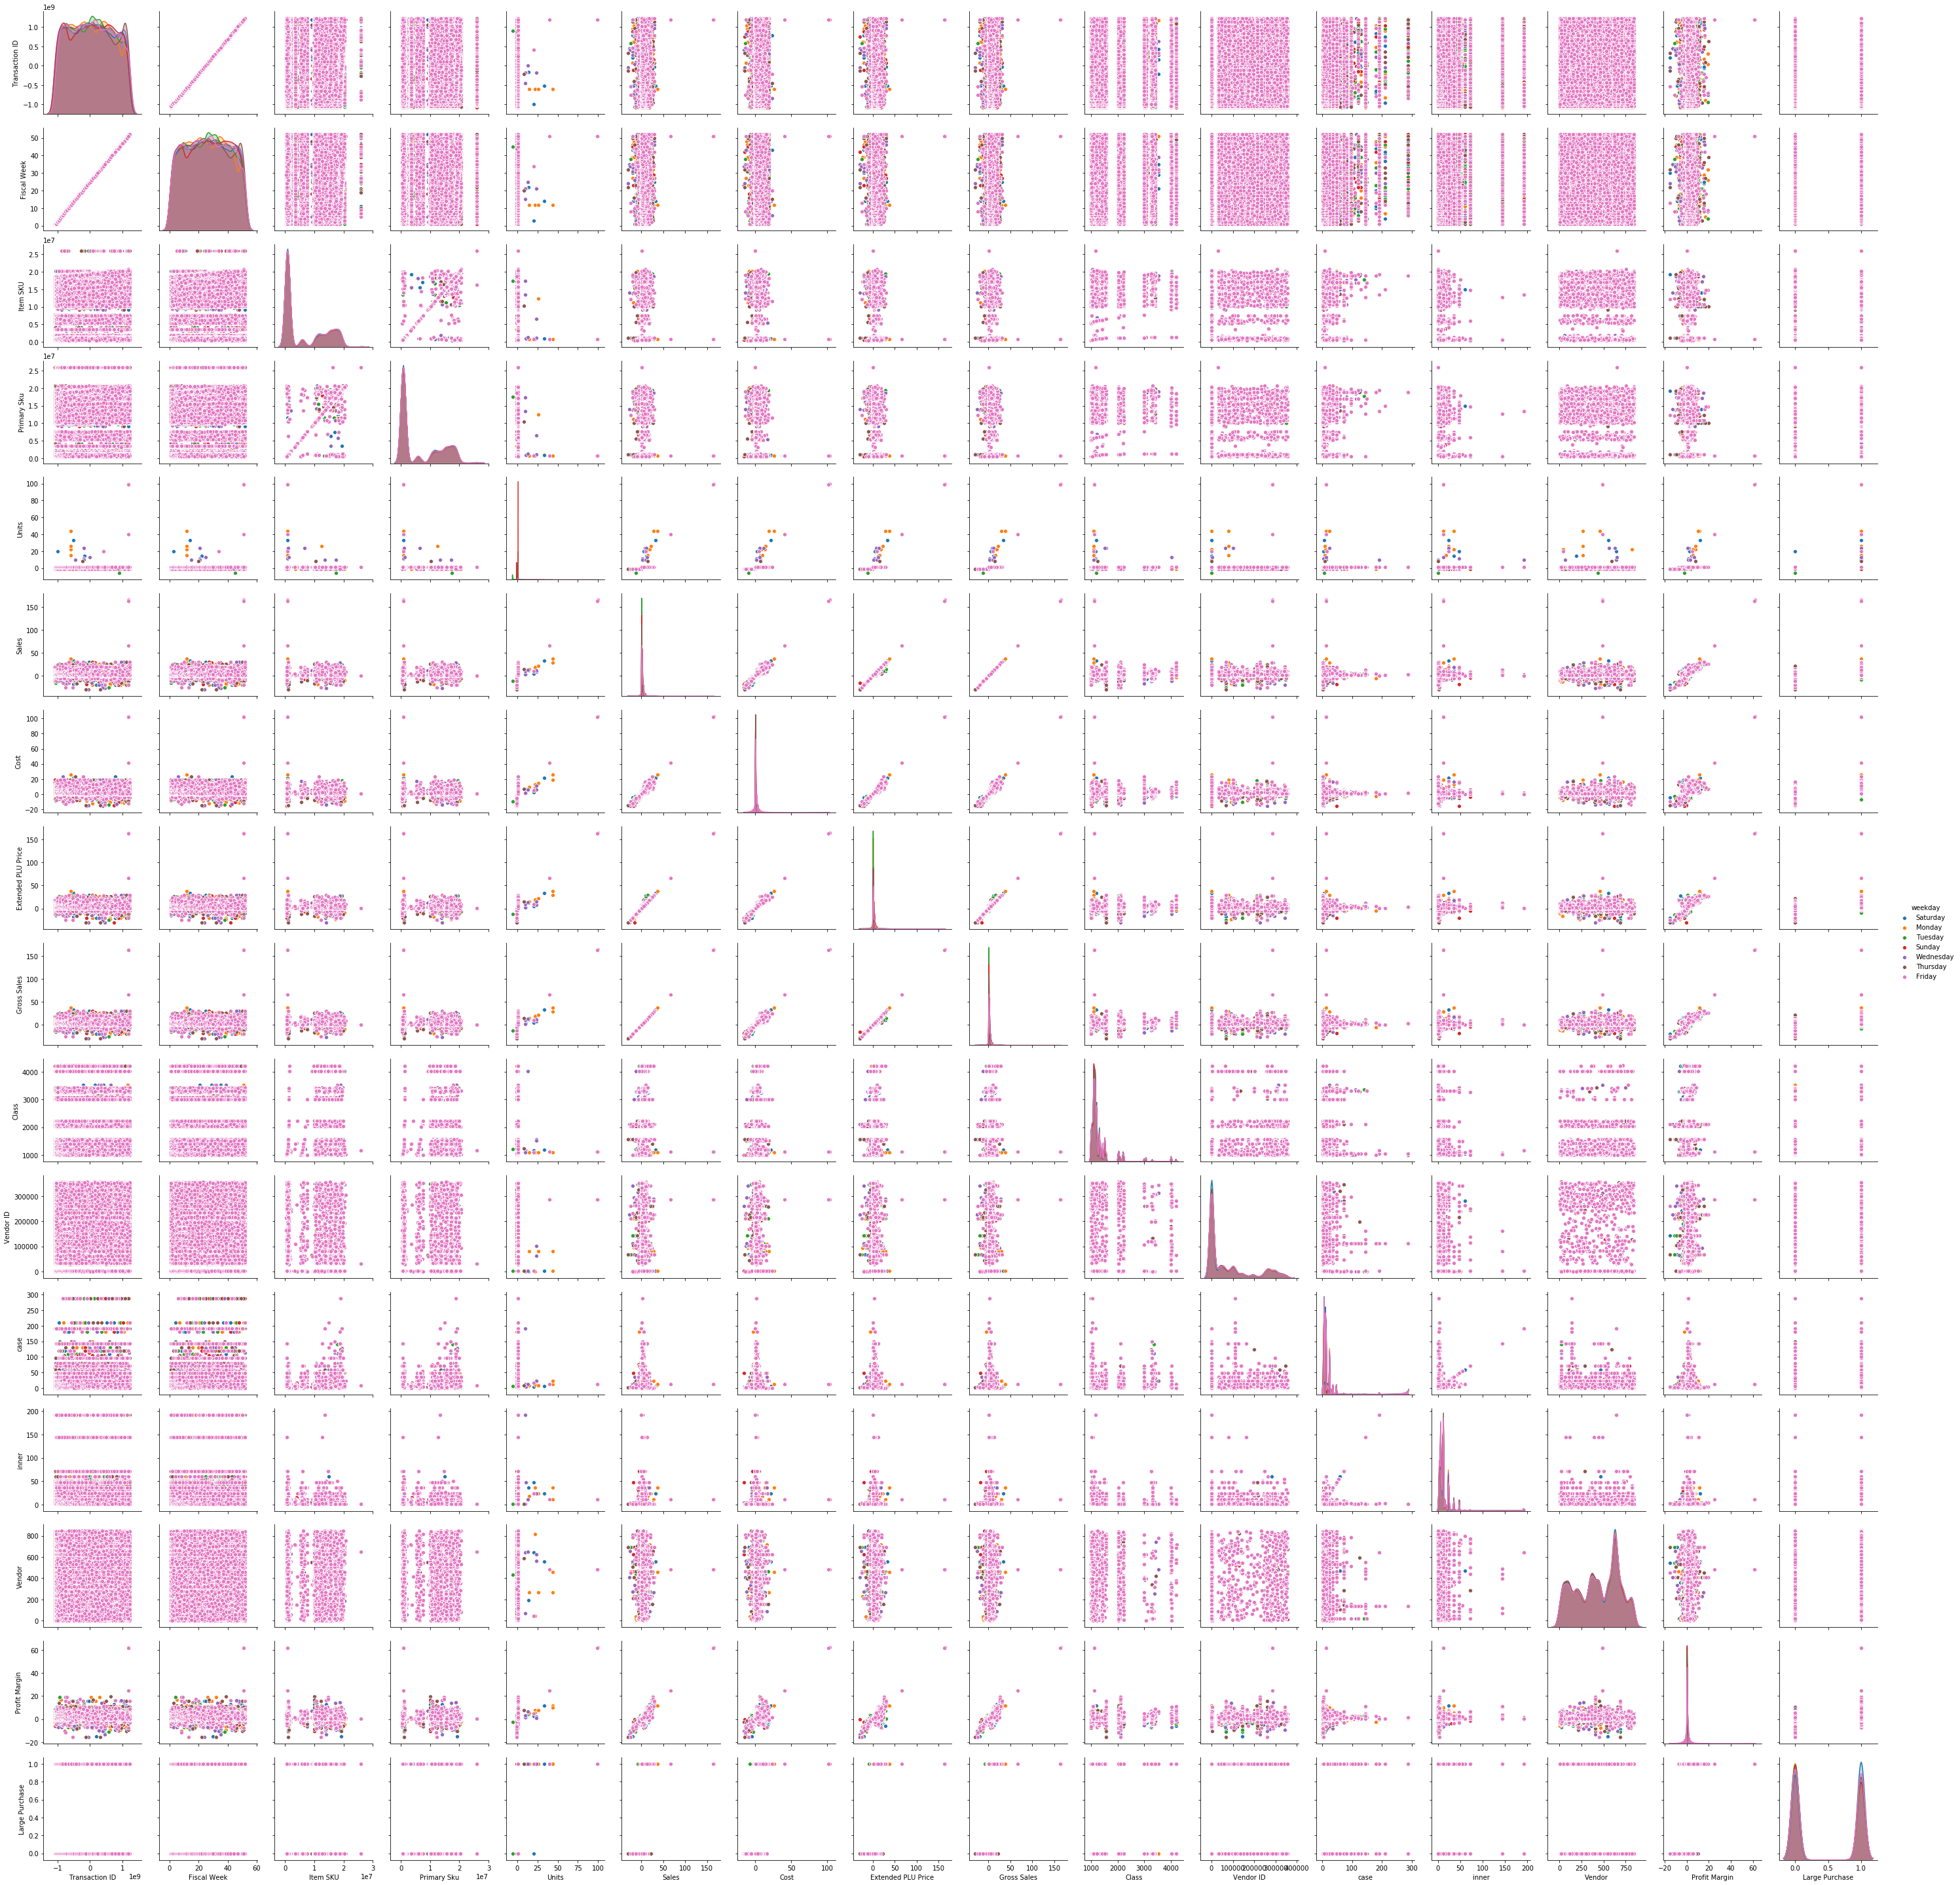

In [255]:
sns.pairplot(sales_combine, hue='weekday')

####  Create Total Purchase column based on 'Transaction ID' groupby
*  Allows me to explore the total purchase value against other values in graphs.

In [621]:

TransSales = sales_combine.groupby('Transaction ID')['Sales'].sum()
TransSales = pd.DataFrame(TransSales)

In [622]:
TransSales.rename(columns={'Sales':'Total Sale'}, inplace=True)

In [623]:
sales_combine = pd.merge(sales_combine, TransSales, on='Transaction ID', how='inner')

#### Bar Plot of average total transaction price by day of the week.

*  Saturday had the highest total purchase average at just under 17 dollars.

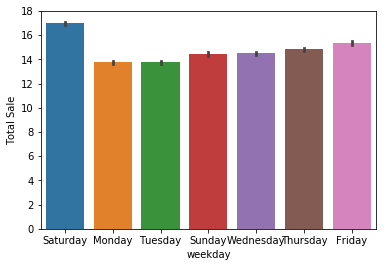

In [293]:
sns.barplot('weekday', 'Total Sale', data=sales_combine)

In [624]:
sales_combine.groupby('weekday')['Total Sale'].mean()

weekday
Friday       15.360541
Monday       13.769714
Saturday     16.988182
Sunday       14.458771
Thursday     14.831482
Tuesday      13.780777
Wednesday    14.504321
Name: Total Sale, dtype: float64

In [294]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,...,Class Description,Vendor ID,case,inner,Item Velocity (IT04),Vendor,weekday,Profit Margin,Large Purchase,Total Sale
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False,4.0
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False,4.0
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,...,PAINT ACCESSORIES CORE,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False,7.5
3,-1081782090,1,2017-02-04,20:08:59,1212704,1212704,1,2.0,0.65625,2.0,...,PAINT ACCESSORIES CORE,344373,4,3,UNASSIGNED,492,Saturday,1.34375,False,7.5
4,-1081782090,1,2017-02-04,20:08:59,1362501,1362501,1,1.0,0.52500,1.0,...,$1 TOYS,1745,8,18,UNASSIGNED,200,Saturday,0.47500,False,7.5


###  Data Transformation (continued)


####  Create Profit Margin Ratio column. 

*  Allows for better understanding of top profitable items and how they relate to other independent variables.

In [625]:
sales_combine['Profit %'] = (sales_combine['Profit Margin'] / sales_combine['Extended PLU Price']) * 100

In [626]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,...,Vendor ID,case,inner,Item Velocity (IT04),Vendor,weekday,Profit Margin,Large Purchase,Total Sale,Profit %
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False,4.0,73.7185
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False,4.0,73.7185
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,...,110108,12,6,UNASSIGNED,543,Saturday,1.47437,False,7.5,73.7185
3,-1081782090,1,2017-02-04,20:08:59,1212704,1212704,1,2.0,0.65625,2.0,...,344373,4,3,UNASSIGNED,492,Saturday,1.34375,False,7.5,67.1875
4,-1081782090,1,2017-02-04,20:08:59,1362501,1362501,1,1.0,0.52500,1.0,...,1745,8,18,UNASSIGNED,200,Saturday,0.47500,False,7.5,47.5000


**Average Profit % is 33%**

In [627]:
sales_combine['Profit %'].mean()

32.96937165249399

#### Breakout of Large Purchase
*  When the binary categorical attribute is used, we see the Large Purchases jump up in their averages.
  *  The Large Purchase averaged near 25 dollars, the small purchases all close to 5 dollars.

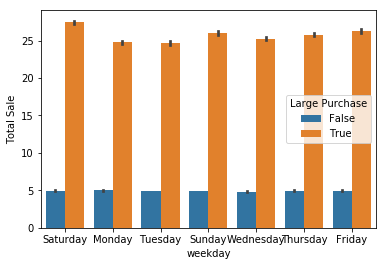

In [305]:
sns.barplot('weekday', 'Total Sale', hue='Large Purchase', data=sales_combine)

#### Count Plot by Weekday with breakout of Large Purchase

*  Saturday has the most sales overall.


*  Saturday is also the only day where Large Purchases are the majority of purchases.
  *  Having more staff on Saturdays, for stocking and checkouts is necessary for Dollar General.

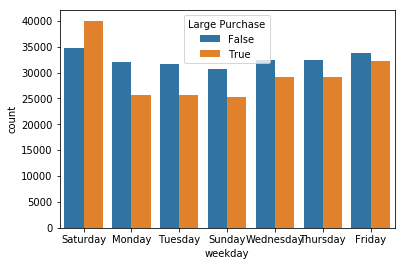

In [307]:
sns.countplot('weekday', hue='Large Purchase', data=sales_combine)

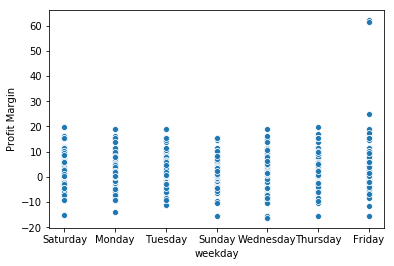

In [342]:
sns.scatterplot('weekday', 'Profit Margin', data=sales_combine)

In [628]:
sales_combine['Profit Margin'].mean()

0.7859132847804333

In [629]:
sales_combine['Sales'].mean()

2.256083347210364

In [346]:
(2.256 - 0.786) / 2.256

0.651595744680851

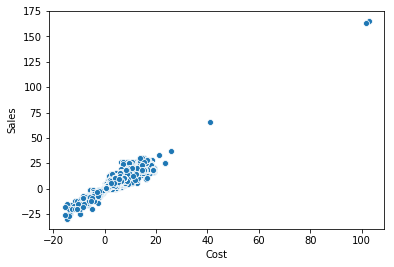

In [338]:
sns.scatterplot('Cost', 'Sales', data=sales_combine)

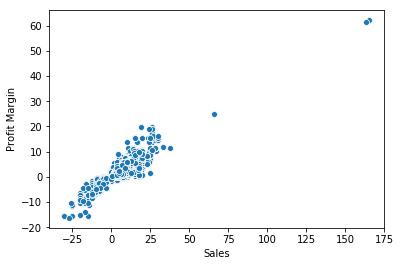

In [349]:
sns.scatterplot('Sales', 'Profit Margin', data=sales_combine)

In [351]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,...,Vendor ID,case,inner,Item Velocity (IT04),Vendor,weekday,Total Sale,Profit Margin,Large Purchase,Profit %
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,110108,12,6,UNASSIGNED,543,Saturday,4.0,1.47437,False,73.7185
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,110108,12,6,UNASSIGNED,543,Saturday,4.0,1.47437,False,73.7185
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,...,110108,12,6,UNASSIGNED,543,Saturday,7.5,1.47437,False,73.7185
3,-1081782090,1,2017-02-04,20:08:59,1212704,1212704,1,2.0,0.65625,2.0,...,344373,4,3,UNASSIGNED,492,Saturday,7.5,1.34375,False,67.1875
4,-1081782090,1,2017-02-04,20:08:59,1362501,1362501,1,1.0,0.52500,1.0,...,1745,8,18,UNASSIGNED,200,Saturday,7.5,0.47500,False,47.5000


#### Transaction Count across Fiscal Weeks

Relatively equal distribution of transactions across the year.
  *  Higher transactions during the middle of the year.
  *  Less transactions in the last few weeks of year and beginning of the new year.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

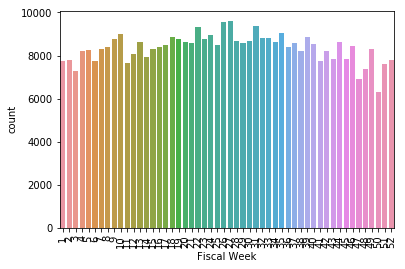

In [355]:
sns.countplot('Fiscal Week', data=sales_combine)
plt.xticks(rotation=90)

### Create Qualitative Field

*  Determine the Fiscal Quarter from the Fiscal Week column.
  
  
  *  Allows for Quarterly comparisons of business performance.

In [630]:
def quarter(x):
    if x['Fiscal Week'] <= 13:
        return 1
    elif x['Fiscal Week'] <= 26:
        return 2
    elif x['Fiscal Week'] <= 39:
        return 3
    else:
        return 4
    
    
sales_combine['Fiscal Quarter'] = sales_combine.apply(quarter, axis=1)


In [631]:
sales_combine.head()

,Transaction ID,Fiscal Week,Date,Time,Item SKU,Primary Sku,Units,Sales,Cost,Extended PLU Price,...,case,inner,Item Velocity (IT04),Vendor,weekday,Profit Margin,Large Purchase,Total Sale,Profit %,Fiscal Quarter
0,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,12,6,UNASSIGNED,543,Saturday,1.47437,False,4.0,73.7185,1
1,-1081782225,1,2017-02-04,14:40:37,16131502,16131502,1,2.0,0.52563,2.0,...,12,6,UNASSIGNED,543,Saturday,1.47437,False,4.0,73.7185,1
2,-1081782090,1,2017-02-04,20:08:59,16131502,16131502,1,2.0,0.52563,2.0,...,12,6,UNASSIGNED,543,Saturday,1.47437,False,7.5,73.7185,1
3,-1081782090,1,2017-02-04,20:08:59,1212704,1212704,1,2.0,0.65625,2.0,...,4,3,UNASSIGNED,492,Saturday,1.34375,False,7.5,67.1875,1
4,-1081782090,1,2017-02-04,20:08:59,1362501,1362501,1,1.0,0.52500,1.0,...,8,18,UNASSIGNED,200,Saturday,0.47500,False,7.5,47.5000,1


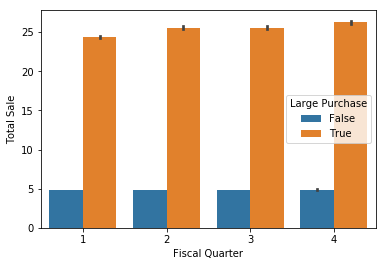

In [397]:
sns.barplot('Fiscal Quarter', 'Total Sale', hue='Large Purchase',data=sales_combine)

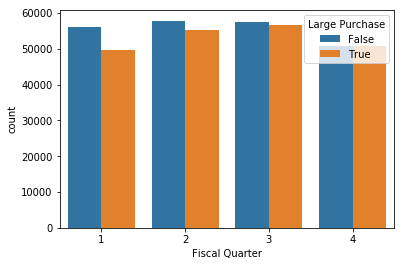

In [398]:
sns.countplot('Fiscal Quarter', data=sales_combine, hue='Large Purchase')

In [632]:
top_margin = sales_combine[sales_combine['Item Velocity (IT04)'] == 'TOP MARGIN']

#### Top Margin Category - Top 10 Item SKUs by Profit %

In [633]:
top_margin.groupby(['Item SKU', 'Primary Sku Description'])['Profit %'].mean().sort_values(ascending=False).head(10)

Item SKU  Primary Sku Description  
12687401  DGH ALL DAY ALLERGY-45 CT    87.137500
18379601  GEM NAIL FILE BLACK          84.816560
1106401   ENERGIZER 2032-2             84.097558
19419601  DGH 3 TO 2 ADAPT 2CT PDQ     82.953251
630601    DGH ANTI-DIARRHEAL CAP-72    81.520000
10764512  TISSUE PAPER DK PINK         81.310000
1031706   SUPER JUMBO ALL OCC E3       81.309466
1043302   SUPER JUMBO BIRTHDAY E7      81.242313
1007101   DGH CRYS CUTLRY SPOON30CT    81.236345
1071401   DG ALKALINE AAA-4            80.867513
Name: Profit %, dtype: float64

It seems there are errors in the price data for some products.  Profit % shouldn't be negative thousands of percent.  The sale price for the least profitable items are priced at one cent.  Surely this does not reflect even a heavily discounted product sale.

In [439]:
sales_combine.groupby(['Item SKU', 'Primary Sku Description','Sales'])['Profit %'].mean().sort_values(ascending=False).tail(10)

Item SKU  Primary Sku Description   Sales
647101    SCUNCI BARRETTES AST-4    0.01    -10625.748698
16891601  BELLE-K HEADWRAP TWISTD   0.01    -11055.174180
643601    SCUNCI JAW CLIP WINGLESS  0.01    -11411.151504
11519601  CONAIR BUN MAKER          0.01    -12085.094614
15497601  SCUNCI H/WRAPS KNOTTED-5  0.01    -12229.095982
15498201  SCUNCI P/TAILS RUFFLED-5  0.01    -12862.250000
11518001  SCUNCI-G PONY KNOTTED-6   0.01    -12909.500000
15498001  SCUNCI H/WRAPS REFLECT-2  0.01    -15795.952652
15497501  SCUNCI H/WRAPS FABRIC-3   0.01    -15823.246528
15498101  SCUNCI H/WRAPS BRAIDED-2  0.01    -15833.750000
Name: Profit %, dtype: float64

In [416]:
sales_combine.columns

Index(['Transaction ID', 'Fiscal Week', 'Date', 'Time', 'Item SKU',
       'Primary Sku', 'Units', 'Sales', 'Cost', 'Extended PLU Price',
       'Gross Sales', 'Primary Sku Description', 'Class', 'Class Description',
       'Vendor ID', 'case', 'inner', 'Item Velocity (IT04)', 'Vendor',
       'weekday', 'Total Sale', 'Profit Margin', 'Large Purchase', 'Profit %',
       'Fiscal Quarter'],
      dtype='object')

In [634]:
top_sales=sales_combine.groupby(['Primary Sku', 'Primary Sku Description'])['Sales'].sum().sort_values(ascending=False).head(10)

In [635]:
top_sales = pd.DataFrame(top_sales)

In [636]:
top_prof = pd.DataFrame(sales_combine[['Primary Sku', 'Profit %']])

In [637]:
top_sales = top_sales.reset_index()

In [638]:
top_sales.head()

,Primary Sku,Primary Sku Description,Sales
0,988504,ANGEL SOFT 12 FAM PACK,6535.89
1,812601,CV SUGAR 4LB,3976.35
2,1082401,ALPO DRY PRIME CUTS 14LB,3843.02
3,17743801,CHARMIN ESS SOFT 12 DR,3735.16
4,1011801,S S 6ROLL BATH TISSUE,2821.67


In [639]:
s_p_merge = pd.merge(top_sales, top_prof, on='Primary Sku', how='inner')

In [640]:
s_p_merge.groupby(['Primary Sku', 'Primary Sku Description']).mean().sort_values(by='Profit %',ascending=False)

,,Sales,Profit %
Primary Sku,Primary Sku Description,,
15105701,DGH 12 MEGA ULTRA STRONG,2379.41,28.600000
1011801,S S 6ROLL BATH TISSUE,2821.67,23.855610
989603,COTTONELLE 12 BIG BATH,2533.06,22.300000
1081001,ALPO DRY COME GET IT 14LB,2262.36,21.682353
1082401,ALPO DRY PRIME CUTS 14LB,3843.02,21.682353
988301,ANGEL SOFT 4PK DBL ROLL,2641.62,20.805468
812601,CV SUGAR 4LB,3976.35,19.371122
17743801,CHARMIN ESS SOFT 12 DR,3735.16,18.100000
988504,ANGEL SOFT 12 FAM PACK,6535.89,18.062078


In [641]:
s_p_merge = s_p_merge.groupby(['Primary Sku', 'Primary Sku Description']).mean().sort_values(by='Sales',ascending=False)

In [642]:
s_p_merge = s_p_merge.reset_index()

In [643]:
most_prof = sales_combine.groupby(['Primary Sku', 'Primary Sku Description'])['Profit %'].mean().sort_values(ascending=False).head(10)

In [644]:
most_prof = pd.DataFrame(most_prof)
most_prof = most_prof.reset_index()

In [645]:
most_prof

,Primary Sku,Primary Sku Description,Profit %
0,11214404,EXCEDRIN MIGRAINE CPL-BNS,99.727273
1,475202,ADVIL TABLETS BONUS-36CT,94.131507
2,1052001,LEAD REFILL .7MM,91.062299
3,1057501,PINK ERASERS 2CT,90.398071
4,1217401,DGH OATMEAL FELT PADS 1IN,89.984808
5,18380001,GEM NAIL BLOCK 7-WAY,87.903669
6,1214405,DGH METAL SCRAPER,87.364481
7,10761801,PORT 2 PKT LAMINATED,87.333997
8,1187501,SEWPTCH SEWNG NEDLE 70CT,87.226452
9,12687401,DGH ALL DAY ALLERGY-45 CT,87.137500


In [646]:
prof_s = sales_combine.groupby(['Primary Sku', 'Primary Sku Description'])['Sales'].sum().sort_values(ascending=False)

In [647]:
prof_s = pd.DataFrame(prof_s)
prof_s = prof_s.reset_index()

In [648]:
prof_s.head(20)

,Primary Sku,Primary Sku Description,Sales
0,988504,ANGEL SOFT 12 FAM PACK,6535.89
1,812601,CV SUGAR 4LB,3976.35
2,1082401,ALPO DRY PRIME CUTS 14LB,3843.02
3,17743801,CHARMIN ESS SOFT 12 DR,3735.16
4,1011801,S S 6ROLL BATH TISSUE,2821.67
5,16050101,FOLGERS COUNTRY RST 31.1Z,2802.98
6,988301,ANGEL SOFT 4PK DBL ROLL,2641.62
7,989603,COTTONELLE 12 BIG BATH,2533.06
8,15105701,DGH 12 MEGA ULTRA STRONG,2379.41
9,1081001,ALPO DRY COME GET IT 14LB,2262.36


In [649]:
most_prof = pd.merge(most_prof, prof_s, on='Primary Sku', how='inner')

In [650]:
most_prof.drop('Primary Sku Description_y', axis=1, inplace=True)

In [651]:
most_sold = sales_combine.groupby(['Primary Sku', 'Primary Sku Description'])['Sales'].count().sort_values(ascending=False).head(10)

In [652]:
most_sold = pd.DataFrame(most_sold)
most_sold = most_sold.reset_index()

In [653]:
p = sales_combine.groupby(['Primary Sku', 'Primary Sku Description'])['Profit %'].mean().sort_values(ascending=False)

In [654]:
p = pd.DataFrame(p)
p = p.reset_index()

In [655]:
most_sold = pd.merge(most_sold, p, on='Primary Sku', how='inner')

In [656]:
most_sold.drop('Primary Sku Description_y', axis=1, inplace=True)

In [657]:
most_sold.rename(columns={'Sales':'Count'}, inplace=True)

In [658]:
long = pd.merge(p, prof_s, on='Primary Sku', how='inner')

In [659]:
long.drop('Primary Sku Description_y', axis=1, inplace=True)

Likely errors in the data reflected in the scatterplot.  Profit % would never be in the 1000s of %.

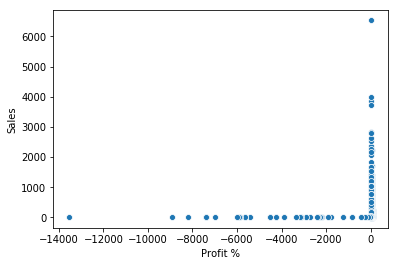

In [660]:
sns.scatterplot('Profit %', 'Sales', data=long)

#### Top 10 Most Sold products (Count) along with the % of Profit for each item

In [661]:
most_sold

,Primary Sku,Primary Sku Description_x,Count,Profit %
0,1011801,S S 6ROLL BATH TISSUE,2832,23.855610
1,812601,CV SUGAR 4LB,2027,19.371122
2,829105,VIENNA SAUSAGES,2021,21.016798
3,765803,REESE SNACK PACK,1666,18.100000
4,988504,ANGEL SOFT 12 FAM PACK,1346,18.062078
5,988301,ANGEL SOFT 4PK DBL ROLL,1320,20.805468
6,1013001,DGH SFT STRONG TWL 1ROLL,1167,37.525000
7,1113501,FP WET FOOD TUNA 5.5OZ,965,27.514159
8,880502,CMPBL CHCKN NOODLE 13.8OZ,948,17.050000
9,1113601,FP WET FOOD CHKN 5.5OZ,860,27.204132


#### Top 10 Most Profitable Products along with the Total Sales for the product

In [662]:
most_prof

,Primary Sku,Primary Sku Description_x,Profit %,Sales
0,11214404,EXCEDRIN MIGRAINE CPL-BNS,99.727273,9.05
1,475202,ADVIL TABLETS BONUS-36CT,94.131507,105.57
2,1052001,LEAD REFILL .7MM,91.062299,7.00
3,1057501,PINK ERASERS 2CT,90.398071,15.19
4,1217401,DGH OATMEAL FELT PADS 1IN,89.984808,37.65
5,18380001,GEM NAIL BLOCK 7-WAY,87.903669,39.00
6,1214405,DGH METAL SCRAPER,87.364481,89.37
7,10761801,PORT 2 PKT LAMINATED,87.333997,51.14
8,1187501,SEWPTCH SEWNG NEDLE 70CT,87.226452,25.07
9,12687401,DGH ALL DAY ALLERGY-45 CT,87.137500,98.00


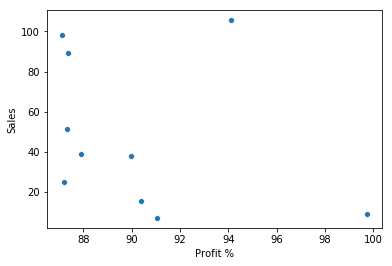

In [558]:
sns.scatterplot('Profit %', 'Sales', data=most_prof)

#### The Items with the Most Total Sales, along with the % of Profit for each product

In [663]:
s_p_merge

,Primary Sku,Primary Sku Description,Sales,Profit %
0,988504,ANGEL SOFT 12 FAM PACK,6535.89,18.062078
1,812601,CV SUGAR 4LB,3976.35,19.371122
2,1082401,ALPO DRY PRIME CUTS 14LB,3843.02,21.682353
3,17743801,CHARMIN ESS SOFT 12 DR,3735.16,18.100000
4,1011801,S S 6ROLL BATH TISSUE,2821.67,23.855610
5,16050101,FOLGERS COUNTRY RST 31.1Z,2802.98,7.610130
6,988301,ANGEL SOFT 4PK DBL ROLL,2641.62,20.805468
7,989603,COTTONELLE 12 BIG BATH,2533.06,22.300000
8,15105701,DGH 12 MEGA ULTRA STRONG,2379.41,28.600000
9,1081001,ALPO DRY COME GET IT 14LB,2262.36,21.682353


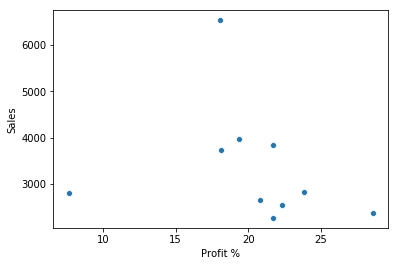

In [557]:
sns.scatterplot('Profit %', 'Sales', data=s_p_merge)

In [553]:
# Average Profit % --for all products
sales_combine['Profit %'].mean()

32.96937165249399

In [554]:
#Average Profit % --for Top 10 items with most total sales

s_p_merge['Profit %'].mean()

20.20691127659034

In [555]:
# Average Profit % --for Top 10 most profitable items

most_prof['Profit %'].mean()

90.2270055939634

In [556]:
# Average Profit % --for Top 10 most sold items

most_sold['Profit %'].mean()

23.050436581547963

### Conclusions:

#### I focused on the Sales data for store 8687 and came up with some interesting findings:

*  **I found grouping by different sales criteria and analyzing the profit margin to be insightful.**


*  Household paper products (toilet paper specifically) were by far the best selling items by sum of sales.

  *  This makes sense. In rural areas, where Dollar General stores are mostly located, people will go shopping in town one day a week. However, household necessities like toilet paper and pet food cannot wait until the end of the week trip to town.
  
  
  *  The profit margin on the both the best selling items and items with the most sales were sound at around 20%.
  *  **Average Profit %**
    
    *  **All Products:**  33%
    *  **Most Sales:**  20%
    *  **Most Profitable:** 90%
    *  **Most Sold:**  23%

*  The pricing of many products seemed to have errors.  There a large quantity of products being sold for one cent.  To me this does not reflect the true price instore -- at least I've never seen a product being sold for a cent! 
  *  Resultingly there is significant skew in both visual and aggregrate representations of the store 8687's sales performance.
    *  Perhaps the pricing issue is a result of DG changing the price values in the data before releasing it for our classes' usage.  My hypothesis.


*  **Fiscal Quarter Countplot:** Creating a countplot from the quantative Fiscal Quarter column, I was a bit surprised to discover Quarter 4 had the least number of sales. I would have suspected Quarter 4 to have the greatest number of sales, when retail stores see the most foot traffic for the year due to the holidays. Perhaps Dollar General is an exception to this idiom, as rural shoppers take their dollars into town where they have a wider selection of products to choose from for their holiday shopping.


*  **Large Purchase Barplot:** When grouped both by Weekday and Fiscal Quarter Large Purchases (>10) averaged near 25 dollars. Transactions totaling less than 10 dollars averaged close to 5 dollars.  Saturdays saw a small increase in total ticket size for both large and small transactions.


*  **Large Purchase Countplot:** Counting the number of transactions grouped by weekday, Saturdays saw significantly more traffic than other days. As insight into changing operations needs, store managers would benefit from scheduling more cashiers and stockers on Saturdays. 
    